In [1]:
#configuración en google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pingouin -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# directorios (path):
path = "gdrive/MyDrive/my_notebooks/datasets/"

In [5]:
df = pd.read_excel(path + 'Banafrut.xlsx', sheet_name='Base')
df

,Año,Semana,Zona,Finca,municipio,temp_media,Precipitación,Humedad relativa,Velocidad del viento,Peso total del racimo (kg)
0,2021,24,NORTE,MEDITERRANEO,TURBO,27.52,109.0,80.04,1.3,30.19
1,2021,25,NORTE,MEDITERRANEO,TURBO,27.98,53.0,78.19,1.4,29.41
2,2021,26,NORTE,MEDITERRANEO,TURBO,28.13,34.0,79.82,1.6,29.37
3,2021,27,NORTE,MEDITERRANEO,TURBO,28.03,25.0,80.65,0.9,29.69
4,2021,28,NORTE,MEDITERRANEO,TURBO,27.51,88.0,84.30,1.3,30.14
...,...,...,...,...,...,...,...,...,...,...
448,2024,14,SUR,CORALES,CHIGORODÓ,28.18,42.0,88.90,0.4,16.93
449,2024,15,SUR,CORALES,CHIGORODÓ,28.27,20.0,88.93,0.6,16.75
450,2024,16,SUR,CORALES,CHIGORODÓ,27.87,414.0,88.52,0.7,16.58
451,2024,17,SUR,CORALES,CHIGORODÓ,28.52,129.0,88.80,0.9,16.83


## Correlación parcial sin estacionalidad

In [6]:
# Definir las variables predictoras y la variable objetivo
variables_predictoras = ['temp_media', 'Precipitación', 'Humedad relativa',
                        'Velocidad del viento']
variable_objetivo = 'Peso total del racimo (kg)'

# Calcular la correlación parcial y el p-valor para cada variable predictora
resultados = []
for variable in variables_predictoras:
    partial_corr = pg.partial_corr(df, x=variable, y=variable_objetivo, method='pearson')
    resultados.append({'Variable': variable,
                       'Correlación parcial': partial_corr['r'][0],
                       'p-valor': partial_corr['p-val'][0]})

# Crear dataframe para almacenar los resultados
results_df = pd.DataFrame(resultados)
results_df

,Variable,Correlación parcial,p-valor
0,temp_media,-0.195038,2.916439e-05
1,Precipitación,-0.064128,1.730374e-01
2,Humedad relativa,0.171857,2.378191e-04
3,Velocidad del viento,0.296218,1.258290e-10


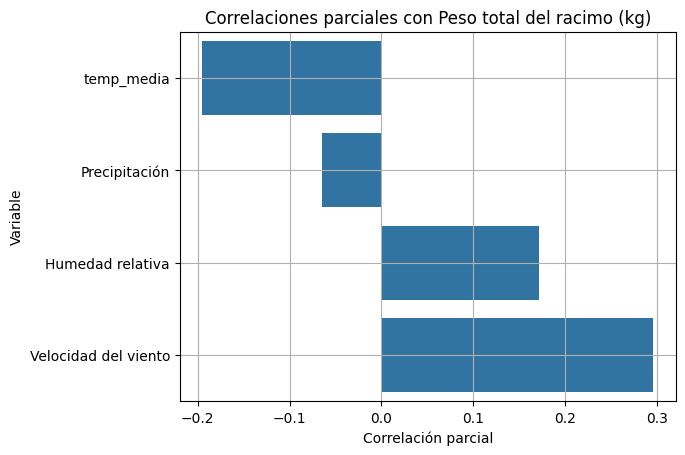

In [7]:
# Crear gráfico de barras para representar las correlaciones parciales
sns.barplot(x='Correlación parcial', y='Variable', data = results_df)
plt.title('Correlaciones parciales con Peso total del racimo (kg)')
plt.xlabel('Correlación parcial')
plt.grid()
plt.show()

##Correlación parcial con estacionalidad (rezagos)

In [8]:
df = pd.read_pickle(path + 'df_rezagos.pkl')
df

,Ano,Semana,Zona,Finca,municipio,Semana_seq,Ano_Semana,temp_media_lag1,temp_media_lag2,temp_media_lag3,...,Velocidad_del_viento_lag43,Velocidad_del_viento_lag44,Velocidad_del_viento_lag45,Velocidad_del_viento_lag46,Velocidad_del_viento_lag47,Velocidad_del_viento_lag48,Velocidad_del_viento_lag49,Velocidad_del_viento_lag50,Velocidad_del_viento_lag51,Peso_total_del_racimo_kg
0,2021,24,CENTRO,MADRE SELVA,CAREPA,1,202124,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.47
1,2021,25,CENTRO,MADRE SELVA,CAREPA,2,202125,27.89,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.78
2,2021,26,CENTRO,MADRE SELVA,CAREPA,3,202126,27.71,27.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.84
3,2021,27,CENTRO,MADRE SELVA,CAREPA,4,202127,26.44,27.71,27.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.81
4,2021,28,CENTRO,MADRE SELVA,CAREPA,5,202128,27.34,26.44,27.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2024,14,SUR,CORALES,CHIGORODÓ,147,202414,28.49,29.01,27.60,...,0.3,0.1,0.2,0.5,0.2,0.3,0.2,0.5,0.5,16.93
449,2024,15,SUR,CORALES,CHIGORODÓ,148,202415,28.18,28.49,29.01,...,0.2,0.3,0.1,0.2,0.5,0.2,0.3,0.2,0.5,16.75
450,2024,16,SUR,CORALES,CHIGORODÓ,149,202416,28.27,28.18,28.49,...,0.8,0.2,0.3,0.1,0.2,0.5,0.2,0.3,0.2,16.58
451,2024,17,SUR,CORALES,CHIGORODÓ,150,202417,27.87,28.27,28.18,...,0.4,0.8,0.2,0.3,0.1,0.2,0.5,0.2,0.3,16.83


In [9]:
# Definir variables predictoras y variable objetivo
variables_predictoras = ['Humedad_relativa', 'Precipitacion', 'temp_media', 'Velocidad_del_viento']
variable_objetivo = 'Peso_total_del_racimo_kg'

corr_parc_semana=[]
# Calcular la correlación parcial y el p-valor para cada variable predictora
for variable in variables_predictoras:
    for semana in range(1,52):
        variable_rezagada = f"{variable}_lag{semana}"
        partial_corr = pg.partial_corr(df, x=variable_rezagada, y=variable_objetivo, method='pearson')
        corr_parc_semana.append({'Semana': semana,
                       'Variable': variable,
                       'CorrParcial': partial_corr['r'][0],
                       'Pvalor': partial_corr['p-val'][0]})

df_corr_parc_semana = pd.DataFrame(corr_parc_semana)
df_corr_parc_semana

,Semana,Variable,CorrParcial,Pvalor
0,1,Humedad_relativa,0.169626,0.000301
1,2,Humedad_relativa,0.167365,0.000380
2,3,Humedad_relativa,0.163413,0.000546
3,4,Humedad_relativa,0.150487,0.001528
4,5,Humedad_relativa,0.139682,0.003397
...,...,...,...,...
199,47,Velocidad_del_viento,0.143945,0.010908
200,48,Velocidad_del_viento,0.141062,0.013064
201,49,Velocidad_del_viento,0.140277,0.014051
202,50,Velocidad_del_viento,0.133318,0.020263


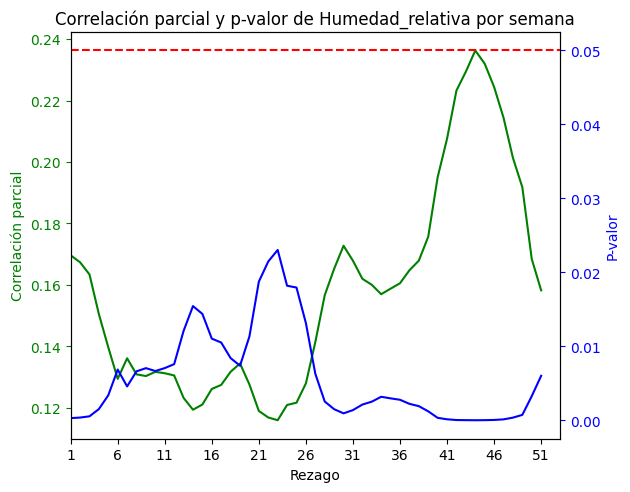

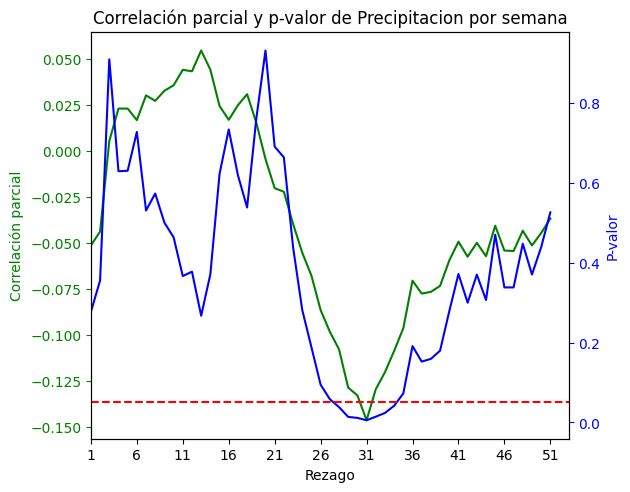

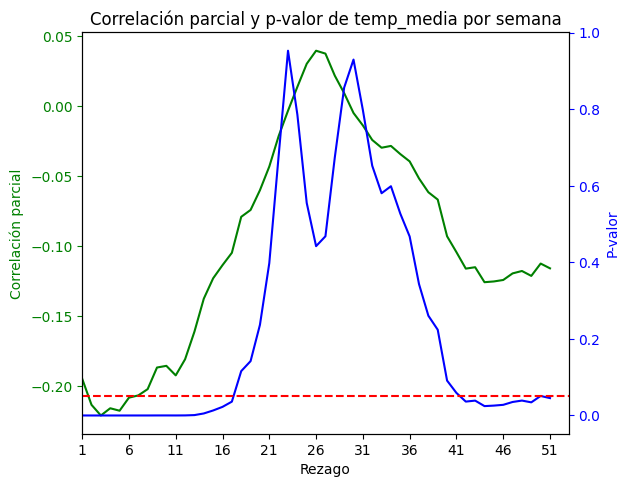

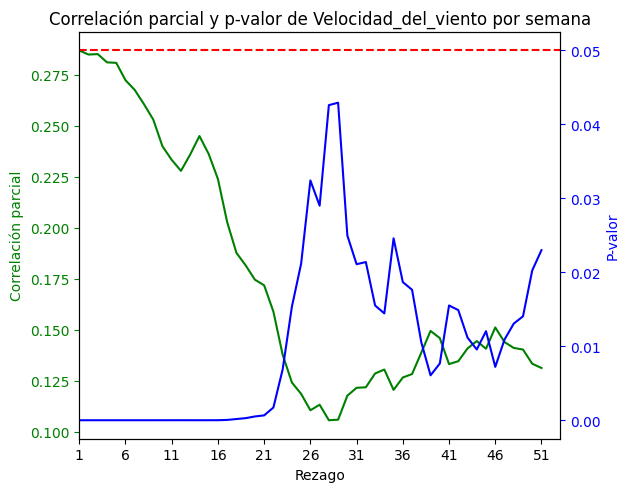

In [10]:
for var in variables_predictoras:
  # Filtra el DataFrame para solo incluir la variable temp_media
  df_temp_media = df_corr_parc_semana[df_corr_parc_semana['Variable'] == var]

  # Graficar la correlación parcial en el eje y1
  fig, ax1 = plt.subplots()
  ax1.plot(df_temp_media['Semana'], df_temp_media['CorrParcial'], 'g-')
  ax1.set_xlabel('Rezago')
  plt.xticks(range(1, 53, 5))
  ax1.set_ylabel('Correlación parcial', color='g')
  ax1.tick_params('y', colors='g')

  # Graficar el p-valor en el eje y2
  ax2 = ax1.twinx()
  ax2.plot(df_temp_media['Semana'], df_temp_media['Pvalor'], 'b-')
  ax2.set_ylabel('P-valor', color='b')
  ax2.tick_params('y', colors='b')

  # Agregar línea roja en y2 = 0.05
  ax2.axhline(y=0.05, color='r', linestyle='--', label='Nivel de significancia (0.05)')

  # Ajustar el título y los límites del gráfico
  fig.tight_layout()
  plt.title('Correlación parcial y p-valor de ' + var + ' por semana')
  plt.xlim(1, 53)

  # Muestra el gráfico
  plt.show()